In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

%matplotlib inline

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 14

In [2]:
player=pd.read_csv('players.csv')
player.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


In [3]:
player.iloc[:,np.r_[1,2,13:21]].fillna(value='Not played')

,player_name,team,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr
0,Brehze,Evil Geniuses,57,14,61,29,0.0,71.1,-4,79.9
1,CeRq,Evil Geniuses,54,10,54,18,4.0,65.1,0,71.7
2,EliGE,Liquid,55,10,51,28,1.0,67.5,4,77.9
3,Ethan,Evil Geniuses,43,5,54,18,2.0,65.1,-11,58.7
4,NAF,Liquid,52,22,46,23,9.0,77.1,6,75.9
...,...,...,...,...,...,...,...,...,...,...
383312,kIMERA,ExAequo,30,2,17,8,Not played,Not played,13,Not played
383313,morphiw0w,ExAequo,26,6,22,9,Not played,Not played,4,Not played
383314,overfly,RIP Fonty,28,4,34,8,Not played,Not played,-6,Not played
383315,simozor,RIP Fonty,18,7,36,9,Not played,Not played,-18,Not played


In [4]:
player[(player['player_name']=='s1mple') & (player['best_of']==3)].iloc[:,np.r_[0:21]].fillna(value='Not played').head(10).sort_index(ascending=False)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr
5475,2020-02-01,s1mple,Natus Vincere,GODSENT,Ukraine,7998,2339155,5147,ICE Challenge 2020,3,...,Dust2,Train,52,2,51,18,2.0,60.0,1,61.1
5355,2020-02-02,s1mple,Natus Vincere,OG,Ukraine,7998,2339157,5147,ICE Challenge 2020,3,...,Mirage,Not played,39,7,26,16,3.0,82.6,13,81.2
4815,2020-02-05,s1mple,Natus Vincere,GODSENT,Ukraine,7998,2339163,5147,ICE Challenge 2020,3,...,Train,Not played,53,5,24,21,Not played,80.8,29,92.0
4566,2020-02-07,s1mple,Natus Vincere,Vitality,Ukraine,7998,2339098,5138,BLAST Premier Spring Series 2020,3,...,Dust2,Not played,41,10,31,22,4.0,71.7,10,78.7
4417,2020-02-08,s1mple,Natus Vincere,Astralis,Ukraine,7998,2339100,5138,BLAST Premier Spring Series 2020,3,...,Nuke,Inferno,74,14,42,34,7.0,77.9,32,90.5
4157,2020-02-09,s1mple,Natus Vincere,Vitality,Ukraine,7998,2339102,5138,BLAST Premier Spring Series 2020,3,...,Dust2,Not played,37,14,28,18,5.0,74.0,9,84.0
4118,2020-02-09,s1mple,Natus Vincere,Complexity,Ukraine,7998,2339103,5138,BLAST Premier Spring Series 2020,3,...,Mirage,Not played,47,5,26,20,1.0,80.4,21,87.6
559,2020-02-24,s1mple,Natus Vincere,FaZe,Ukraine,7998,2339375,4901,IEM Katowice 2020,3,...,Dust2,Overpass,57,16,46,18,7.0,72.8,11,77.7
369,2020-02-25,s1mple,Natus Vincere,fnatic,Ukraine,7998,2339383,4901,IEM Katowice 2020,3,...,Inferno,Mirage,70,12,53,20,6.0,71.6,17,89.6
38,2020-02-26,s1mple,Natus Vincere,NiP,Ukraine,7998,2339390,4901,IEM Katowice 2020,3,...,Train,Not played,46,11,20,16,6.0,82.2,26,87.3


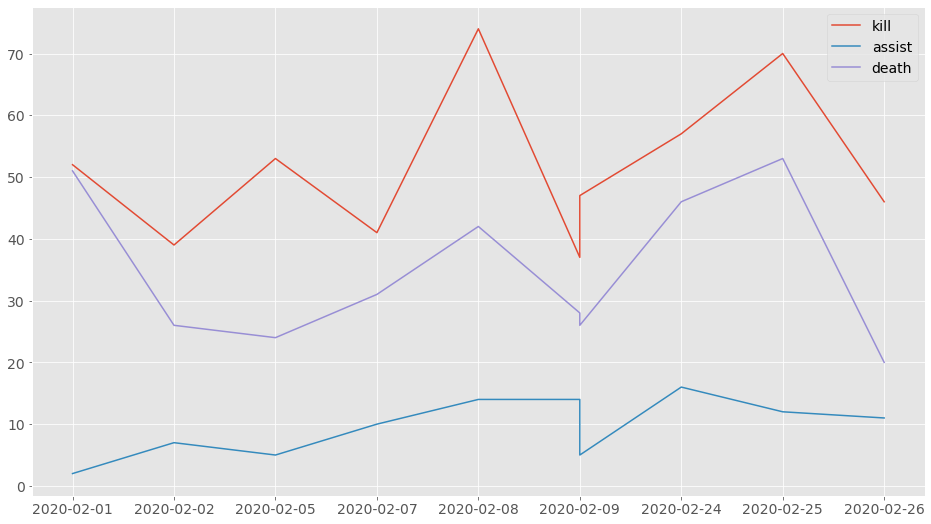

In [5]:
#overall performance of single selected player

player[(player['player_name']=='s1mple') & (player['best_of']==3)].iloc[:,np.r_[1:21]].head(10).sort_index(ascending=False)
date=player[(player['player_name']=='s1mple') & (player['best_of']==3)].iloc[:,0].head(10).sort_index(ascending=False)
kill=player[(player['player_name']=='s1mple') & (player['best_of']==3)].iloc[:,13].head(10).sort_index(ascending=False)
assist=player[(player['player_name']=='s1mple') & (player['best_of']==3)].iloc[:,14].head(10).sort_index(ascending=False)
death=player[(player['player_name']=='s1mple') & (player['best_of']==3)].iloc[:,15].head(10).sort_index(ascending=False)

fig, ax = plt.subplots()
ax.plot(date, kill, label="kill")
ax.plot(date, assist, label="assist")
ax.plot(date, death, label="death")
ax.legend()

plt.show()

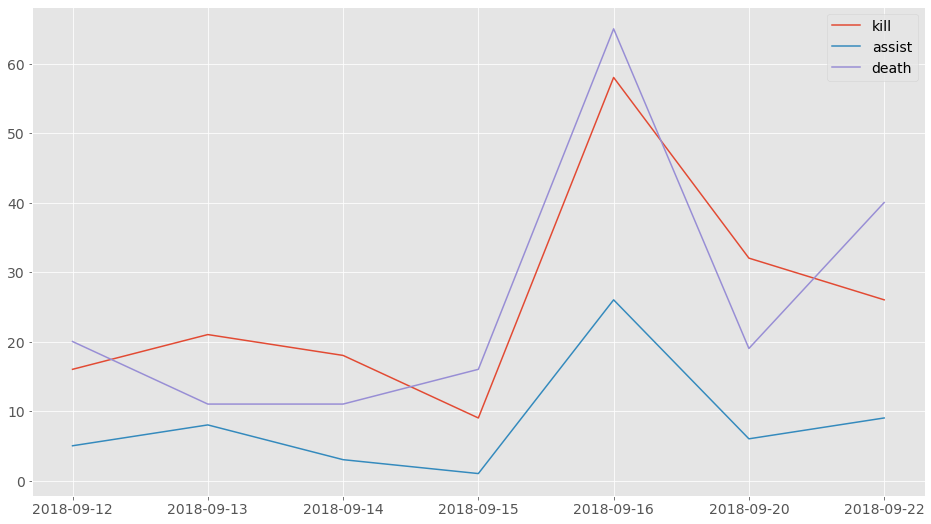

In [6]:
def perf(gamer,event):
    player[(player['player_name']==gamer) & (player['event_name']==event)].iloc[:,np.r_[1:21]].head(10).sort_index(ascending=False)
    date=player[(player['player_name']==gamer) & (player['event_name']==event)].iloc[:,0].head(10).sort_index(ascending=False)
    kill=player[(player['player_name']==gamer) & (player['event_name']==event)].iloc[:,13].head(10).sort_index(ascending=False)
    assist=player[(player['player_name']==gamer) & (player['event_name']==event)].iloc[:,14].head(10).sort_index(ascending=False)
    death=player[(player['player_name']==gamer) & (player['event_name']==event)].iloc[:,15].head(10).sort_index(ascending=False)

    fig, ax = plt.subplots()
    ax.plot(date, kill, label="kill")
    ax.plot(date, assist, label="assist")
    ax.plot(date, death, label="death")
    ax.legend()

    plt.show()
    
perf('tarik','FACEIT Major 2018')

In [7]:
#match 1 performance of selected player
player[player['player_name']=='tarik'].iloc[:,np.r_[1:5,10,23:33]].fillna(value='Not played')

,player_name,team,opponent,country,map_1,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating
9,tarik,Evil Geniuses,Liquid,United States,Overpass,14,7,15,6,3.0,69.6,-1,63.4,-1,0.95
469,tarik,Evil Geniuses,MAD Lions,United States,Vertigo,19,7,15,7,6.0,78.3,4,81.0,-1,1.22
2058,tarik,Evil Geniuses,OG,United States,Train,20,3,10,5,0.0,85.0,10,99.5,2,1.54
2558,tarik,Evil Geniuses,100 Thieves,United States,Train,16,4,10,5,1.0,95.0,6,64.0,1,1.26
2947,tarik,Evil Geniuses,OG,United States,Inferno,17,5,24,8,0.0,73.3,-7,67.2,-1,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381761,tarik,CLG,3sUP,United States,Overpass,26,9,23,10,Not played,Not played,3,Not played,-1,1.28
382068,tarik,CLG,Splyce,United States,Cobblestone,20,5,9,8,Not played,Not played,11,Not played,1,1.57
382328,tarik,CLG,Method,United States,Cache,18,4,18,8,Not played,Not played,0,Not played,0,0.91
382966,tarik,USA,Netherlands,United States,Cache,15,2,16,3,Not played,Not played,-1,Not played,1,0.94


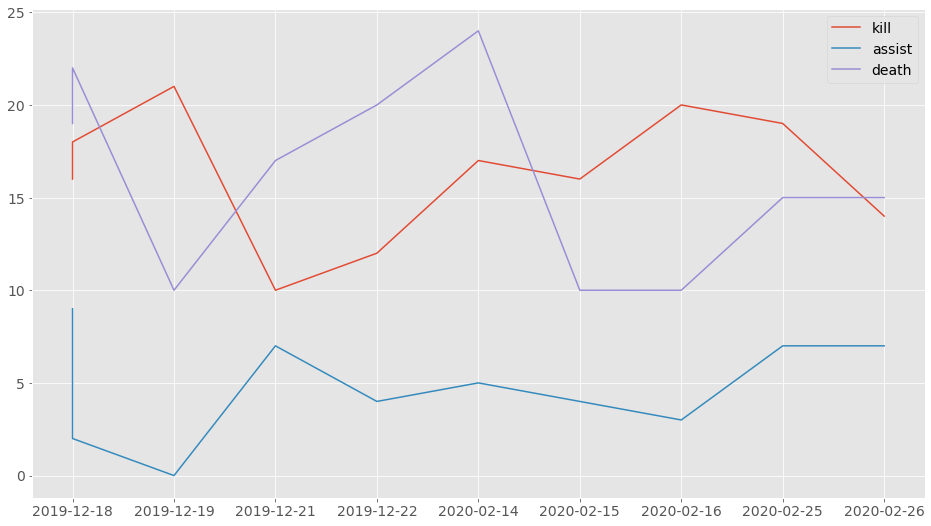

In [8]:
#match 1 performance of selected player
date=player[player['player_name']=='tarik'].iloc[:,0].head(10).sort_index(ascending=False)
kill=player[player['player_name']=='tarik'].iloc[:,23].head(10).sort_index(ascending=False)
assist=player[player['player_name']=='tarik'].iloc[:,24].head(10).sort_index(ascending=False)
death=player[player['player_name']=='tarik'].iloc[:,25].head(10).sort_index(ascending=False)

fig, ax = plt.subplots()
ax.plot(date, kill, label="kill")
ax.plot(date, assist, label="assist")
ax.plot(date, death, label="death")
ax.legend()

plt.show()

In [9]:
#match 2 performance of selected player
player[(player['player_name']=='tarik') & player['map_2'].notnull()].iloc[:,np.r_[1:5,11,33:43]].fillna(value='Not played')

,player_name,team,opponent,country,map_2,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating
9,tarik,Evil Geniuses,Liquid,United States,Nuke,20.0,8.0,26.0,8.0,3.0,67.6,-6.0,68.7,-3.0,0.84
469,tarik,Evil Geniuses,MAD Lions,United States,Dust2,15.0,2.0,20.0,8.0,2.0,56.7,-5.0,37.3,-2.0,0.66
2058,tarik,Evil Geniuses,OG,United States,Mirage,8.0,1.0,15.0,2.0,1.0,68.4,-7.0,47.5,-3.0,0.65
2558,tarik,Evil Geniuses,100 Thieves,United States,Nuke,29.0,7.0,19.0,7.0,0.0,82.9,10.0,84.0,0.0,1.39
2947,tarik,Evil Geniuses,OG,United States,Nuke,21.0,5.0,21.0,4.0,0.0,73.3,0.0,75.3,1.0,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377320,tarik,CLG,Enemy,United States,Train,31.0,5.0,9.0,5.0,Not played,Not played,22.0,Not played,2.0,2.40
378829,tarik,CLG,Natus Vincere,United States,Cobblestone,26.0,9.0,18.0,13.0,Not played,Not played,8.0,Not played,2.0,1.31
379905,tarik,CLG,Complexity,United States,Cobblestone,22.0,6.0,19.0,6.0,Not played,Not played,3.0,Not played,3.0,1.16
381731,tarik,CLG,Liquid,United States,Cache,18.0,4.0,22.0,6.0,Not played,Not played,-4.0,Not played,0.0,0.82


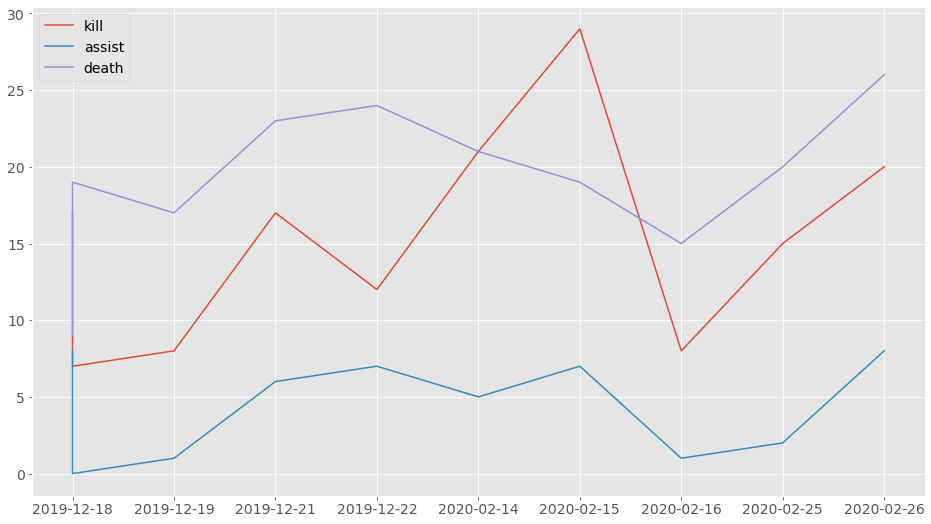

In [10]:
#match 2 performance of selected player
date=player[player['player_name']=='tarik'].iloc[:,0].head(10).sort_index(ascending=False)
kill=player[player['player_name']=='tarik'].iloc[:,33].head(10).sort_index(ascending=False)
assist=player[player['player_name']=='tarik'].iloc[:,34].head(10).sort_index(ascending=False)
death=player[player['player_name']=='tarik'].iloc[:,35].head(10).sort_index(ascending=False)

fig, ax = plt.subplots()
ax.plot(date, kill, label="kill")
ax.plot(date, assist, label="assist")
ax.plot(date, death, label="death")
ax.legend()

plt.show()

In [11]:
#Counter terrorist side performance of selected player
player[player['player_name']=='tarik'].iloc[:,np.r_[1:5,53:59]].fillna(value='Incomplete record')

,player_name,team,opponent,country,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct
9,tarik,Evil Geniuses,Liquid,United States,31.0,29.0,2.0,68.4,77.1,1.01
469,tarik,Evil Geniuses,MAD Lions,United States,22.0,25.0,-3.0,61.7,68.4,0.81
2058,tarik,Evil Geniuses,OG,United States,26.0,19.0,7.0,86.4,82.4,1.25
2558,tarik,Evil Geniuses,100 Thieves,United States,29.0,18.0,11.0,85.3,87.9,1.28
2947,tarik,Evil Geniuses,OG,United States,32.0,34.0,-2.0,75.3,75.0,0.94
...,...,...,...,...,...,...,...,...,...,...
381761,tarik,CLG,3sUP,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record
382068,tarik,CLG,Splyce,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record
382328,tarik,CLG,Method,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record
382966,tarik,USA,Netherlands,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record


In [12]:
#Terrorist side performance of selected player
player[player['player_name']=='tarik'].iloc[:,np.r_[1:5,59:65]].fillna(value='Incomplete record')

,player_name,team,opponent,country,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t
9,tarik,Evil Geniuses,Liquid,United States,19.0,30.0,-11.0,70.3,60.0,0.79
469,tarik,Evil Geniuses,MAD Lions,United States,24.0,23.0,1.0,61.7,72.2,1.01
2058,tarik,Evil Geniuses,OG,United States,19.0,27.0,-8.0,53.9,62.9,0.79
2558,tarik,Evil Geniuses,100 Thieves,United States,16.0,11.0,5.0,63.8,86.4,1.4
2947,tarik,Evil Geniuses,OG,United States,27.0,36.0,-9.0,66.7,68.8,0.93
...,...,...,...,...,...,...,...,...,...,...
381761,tarik,CLG,3sUP,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record
382068,tarik,CLG,Splyce,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record
382328,tarik,CLG,Method,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record
382966,tarik,USA,Netherlands,United States,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record,Incomplete record


In [13]:
#overall performance of the players
player[player['team']=='Natus Vincere'].iloc[:,np.r_[1:5,13:21]].head(5)

,player_name,team,opponent,country,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr
30,Boombl4,Natus Vincere,NiP,Russia,32,13,25,14,1.0,80.0,7,80.5
32,Perfecto,Natus Vincere,NiP,Russia,33,9,23,10,0.0,84.4,10,81.8
35,electronic,Natus Vincere,NiP,Russia,29,10,26,14,1.0,75.6,3,79.5
36,flamie,Natus Vincere,NiP,Russia,43,10,25,24,1.0,77.8,18,93.6
38,s1mple,Natus Vincere,NiP,Ukraine,46,11,20,16,6.0,82.2,26,87.3


In [14]:
# list current and former players for selected team
player[player['team']=='Natus Vincere']['player_name'].unique()

array(['Boombl4', 'Perfecto', 'electronic', 'flamie', 's1mple',
       'GuardiaN', 'Zeus', 'Edward', 'Kane', 'kalinka', '1uke', 'seized',
       'nrkkk', 'starix'], dtype=object)

In [15]:
#list all player records in selected event

player[player['event_name']=='World Championships 2015'].iloc[:,np.r_[1:7,21:32]]

,player_name,team,opponent,country,player_id,match_id,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff
382728,Furlan,Poland,France,Poland,8327,2298554,3,1.09,18,4,14,10,NaN,NaN,4,NaN,1
382729,Happy,France,Poland,France,7429,2298554,4,1.26,18,3,16,7,NaN,NaN,2,NaN,0
382730,MICHU,Poland,France,Poland,7356,2298554,-12,0.71,18,3,16,12,NaN,NaN,2,NaN,-1
382731,NBK-,France,Poland,France,7168,2298554,-5,1.02,19,4,20,10,NaN,NaN,-1,NaN,-2
382732,SZPERO,Poland,France,Poland,973,2298554,4,1.28,25,3,19,9,NaN,NaN,6,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383202,k1Ng0r,Serbia,Sweden,Serbia,1007,2298498,0,0.90,16,2,19,10,NaN,NaN,-3,NaN,0
383203,kassad,Serbia,Sweden,Serbia,3291,2298498,-4,0.46,8,2,19,4,NaN,NaN,-11,NaN,-4
383204,pauf,Sweden,Serbia,Sweden,8096,2298498,3,1.29,22,5,14,13,NaN,NaN,8,NaN,3
383205,pronax,Sweden,Serbia,Sweden,41,2298498,1,1.43,22,5,13,7,NaN,NaN,9,NaN,1


In [16]:
#player performance on selected map
player[(player['player_name']=='tarik') & ((player['map_1']=='Dust2') | (player['map_2']=='Dust2') | (player['map_3']=='Dust2'))].iloc[:,np.r_[0:3,10:13,23,33,43]].head(10)

,date,player_name,team,map_1,map_2,map_3,m1_kills,m2_kills,m3_kills
469,2020-02-25,tarik,Evil Geniuses,Vertigo,Dust2,Nuke,19,15.0,12.0
2947,2020-02-14,tarik,Evil Geniuses,Inferno,Nuke,Dust2,17,21.0,21.0
10187,2019-12-21,tarik,Evil Geniuses,Mirage,Dust2,NaN,10,17.0,NaN
14544,2019-12-05,tarik,Evil Geniuses,Mirage,Dust2,Nuke,16,11.0,12.0
15641,2019-11-28,tarik,Evil Geniuses,Inferno,Dust2,NaN,6,21.0,NaN
15741,2019-11-28,tarik,Evil Geniuses,Dust2,NaN,NaN,23,NaN,NaN
17391,2019-11-21,tarik,Evil Geniuses,Dust2,Mirage,Overpass,5,8.0,23.0
20220,2019-11-08,tarik,Evil Geniuses,Nuke,Inferno,Dust2,16,16.0,20.0
20530,2019-11-07,tarik,Evil Geniuses,Nuke,Dust2,NaN,12,13.0,NaN
23800,2019-10-27,tarik,Evil Geniuses,Dust2,Mirage,NaN,22,11.0,NaN


9        14
16983    19
26499    21
39565    24
Name: m1_kills, dtype: int64
9977     12
24779    22
34612    17
37627    14
Name: m2_kills, dtype: int32
15343     8
17391    23
Name: m3_kills, dtype: int32
{9: 14, 16983: 19, 26499: 21, 39565: 24, 9977: 12, 24779: 22, 34612: 17, 37627: 14, 15343: 8, 17391: 23}
{39565: 24, 37627: 14, 34612: 17, 26499: 21, 24779: 22, 17391: 23, 16983: 19, 15343: 8, 9977: 12, 9: 14}


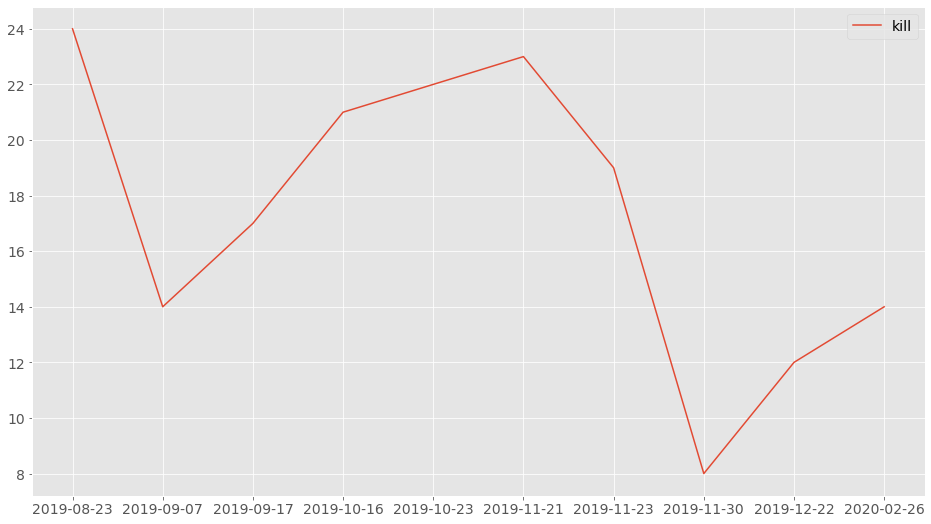

In [17]:
def perf_map(gamer,map_name):
    #player performance on selected map
    filtered=player[(player['player_name']==gamer) & ((player['map_1']==map_name) | (player['map_2']==map_name) | (player['map_3']==map_name))].head(10)

    #retrieve from m1_kills column
    map_1_kill=filtered[filtered['map_1']==map_name].iloc[:,23]

    #retrieve from m2_kills column
    map_2_kill=filtered[filtered['map_2']==map_name].iloc[:,33]
    map_2_kill=map_2_kill.astype(int)
    
    #retrieve from m3_kills column
    map_3_kill=filtered[filtered['map_3']==map_name].iloc[:,43]
    map_3_kill=map_3_kill.astype(int)
    
    print(map_1_kill)
    print(map_2_kill)
    print(map_3_kill)

    #combine 3 columns to display single dict of kills record for selected map
    shape_1=0
    shape_2=0
    shape_3=0
    map_kill={}

    while (shape_1<map_1_kill.shape[0]):
        map_kill[map_1_kill.index[shape_1]]=map_1_kill.get(map_1_kill.index[shape_1])
        shape_1+=1

    while (shape_2<map_2_kill.shape[0]):
        map_kill[map_2_kill.index[shape_2]]=map_2_kill.get(map_2_kill.index[shape_2])
        shape_2+=1

    while (shape_3<map_3_kill.shape[0]):
        map_kill[map_3_kill.index[shape_3]]=map_3_kill.get(map_3_kill.index[shape_3])
        shape_3+=1

    print(map_kill)

    map_kill_sorted=dict(sorted(map_kill.items(), reverse=True))
    print(map_kill_sorted)

    date_sorted=filtered.iloc[:,0].sort_index(ascending=False)
    kill_map=list(map_kill_sorted.values())
    fig, ax = plt.subplots()

    ax.plot(date_sorted,kill_map, label="kill")

    ax.legend()
    
perf_map('tarik','Overpass')

In [18]:
#display number of times a map is selected
map_1=player['map_1'].value_counts()
map_2=player['map_2'].value_counts()
map_3=player['map_3'].value_counts()

print(map_1)
print(map_2)
print(map_3)
map_total=map_1+map_2+map_3

#'Default' map doesn't exist in map_3 and adding it would turn the Default count to NaN
#Hence 'Default' count from the sum of map_1 and map_2 has to be manually inserted into map_total
map_total['Default']=map_1['Default']+map_2['Default']
print(map_total.astype(int))

Mirage         80291
Inferno        61791
Train          50547
Cache          45314
Overpass       44670
Dust2          32789
Cobblestone    31830
Nuke           29424
Vertigo         3797
Default         2864
Name: map_1, dtype: int64
Mirage         39631
Inferno        30454
Train          26550
Overpass       23803
Cache          22513
Dust2          19431
Nuke           17361
Cobblestone    14283
Vertigo         2487
Default           10
Name: map_2, dtype: int64
Mirage         12500
Inferno        11210
Train          11057
Overpass        8524
Dust2           7006
Cache           6911
Nuke            5452
Cobblestone     5279
Vertigo          739
Name: map_3, dtype: int64
Cache           74738
Cobblestone     51392
Default          2874
Dust2           59226
Inferno        103455
Mirage         132422
Nuke            52237
Overpass        76997
Train           88154
Vertigo          7023
dtype: int32


<AxesSubplot:ylabel='None'>

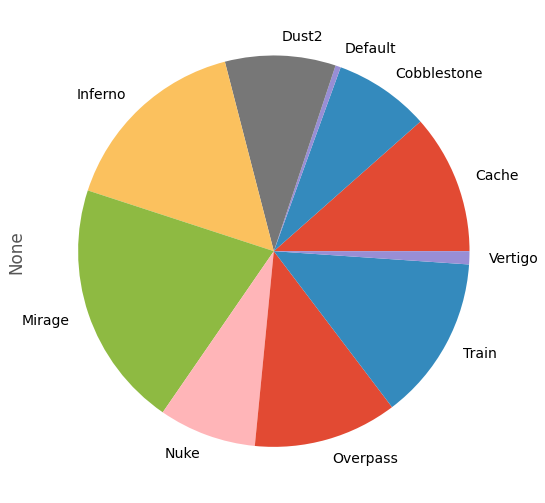

In [19]:
map_total.plot.pie(y='count',figsize=(9,9))

<AxesSubplot:>

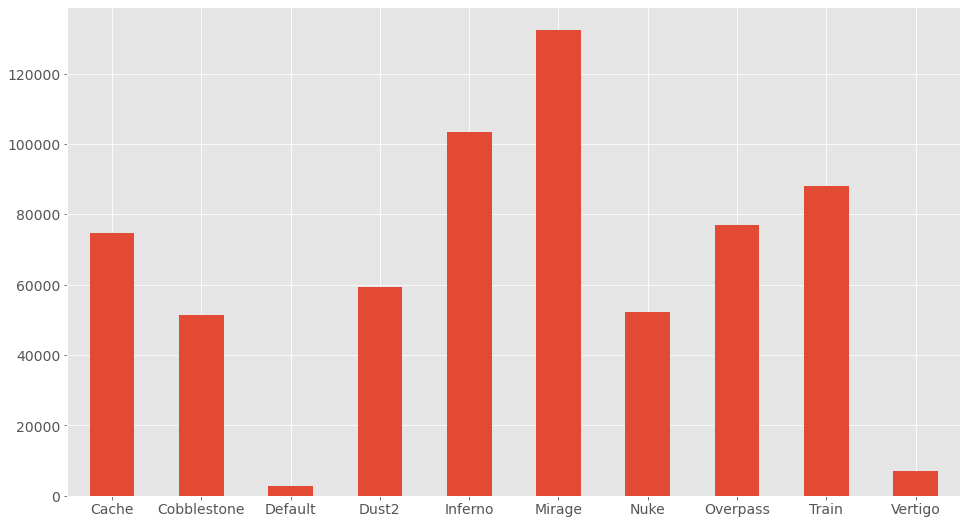

In [20]:
map_total.plot.bar(x='map', y='count', rot=0)

In [21]:
map_total_dict=map_total.to_dict()
print(map_total_dict)

{'Cache': 74738.0, 'Cobblestone': 51392.0, 'Default': 2874.0, 'Dust2': 59226.0, 'Inferno': 103455.0, 'Mirage': 132422.0, 'Nuke': 52237.0, 'Overpass': 76997.0, 'Train': 88154.0, 'Vertigo': 7023.0}


In [22]:
def map_count(**kwargs):
    for k, v in kwargs.items():
        v=int(v)
        print(f"Map {k} is played {v} times")

map_count(**map_total_dict)

Map Cache is played 74738 times
Map Cobblestone is played 51392 times
Map Default is played 2874 times
Map Dust2 is played 59226 times
Map Inferno is played 103455 times
Map Mirage is played 132422 times
Map Nuke is played 52237 times
Map Overpass is played 76997 times
Map Train is played 88154 times
Map Vertigo is played 7023 times


Inferno     37
Mirage      19
Overpass    19
Train       16
Dust2       12
Nuke        10
Vertigo      2
Cache        1
Name: map_1, dtype: int32
Mirage      2
Inferno     2
Nuke        1
Overpass    1
Name: map_2, dtype: int32
Train    2
Name: map_3, dtype: int32
{'Mirage': 21, 'Inferno': 39, 'Train': 18, 'Cache': 1, 'Overpass': 20, 'Dust2': 12, 'Nuke': 11, 'Vertigo': 2}


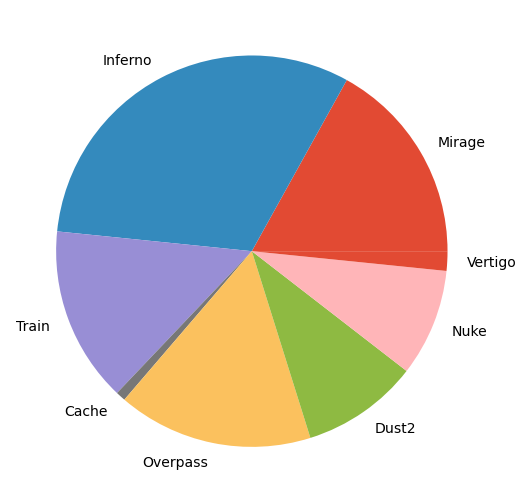

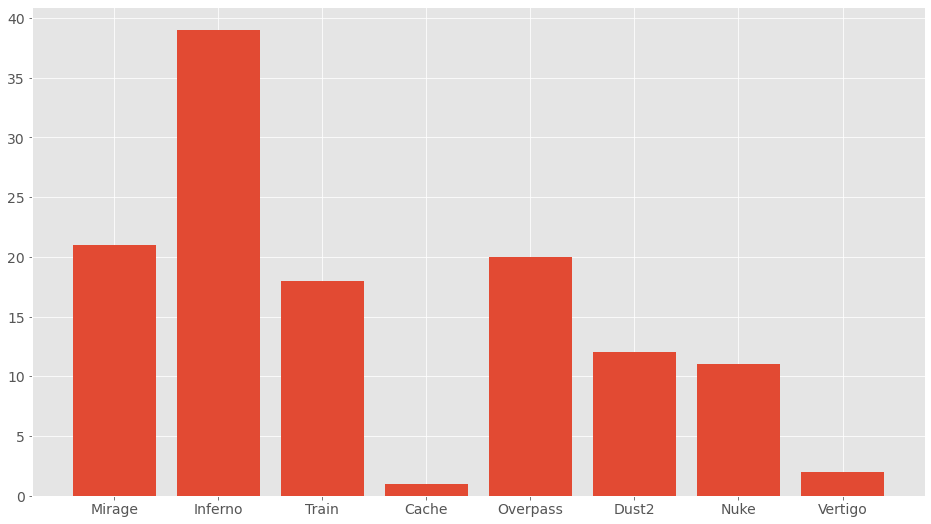

In [23]:
def map_played_count_event(event):
    #display number of times a map is selected
    
    map_1=player[player['event_name']==event].loc[:,'map_1']
    m1_count=(map_1.value_counts()/10).astype(int)
    map_2=player[player['event_name']==event].loc[:,'map_2']
    m2_count=(map_2.value_counts()/10).astype(int)
    map_3=player[player['event_name']==event].loc[:,'map_3']
    m3_count=(map_3.value_counts()/10).astype(int)

    print(m1_count)
    print(m2_count)
    print(m3_count)


    map_count={'Mirage':0,'Inferno':0,'Train':0,'Cache':0,'Overpass':0,'Dust2':0,'Cobblestone':0,'Nuke':0,'Vertigo':0,'Default':0}
    shape_1=0
    shape_2=0
    shape_3=0

    while (shape_1<m1_count.shape[0]):
        map_count[m1_count.index[shape_1]]+=m1_count.get(m1_count.index[shape_1])
        shape_1+=1

    while (shape_2<m2_count.shape[0]):
        map_count[m2_count.index[shape_2]]+=m2_count.get(m2_count.index[shape_2])
        shape_2+=1

    while (shape_3<m3_count.shape[0]):
        map_count[m3_count.index[shape_3]]+=m3_count.get(m3_count.index[shape_3])
        shape_3+=1
        
    
#remove maps that are not played at all
    map_count = {key:val for key, val in map_count.items() if val != 0}
            
    print(map_count)
    
    # Get the Keys and store them in a list
    labels = list(map_count.keys())

    # Get the Values and store them in a list
    values = list(map_count.values())
    
    plt.pie(values, labels=labels)
    plt.show()
    
    plt.bar(labels, values)
    plt.show()
            

map_played_count_event('Brasil Game Show 2019')